In [2]:
pip install pycaret


  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67957 sha256=07e19e6613ad9f1d6bc60ad61ca6e8382709c154da4daaed9f33770daca2895b
  Stored in directory: c:\users\oumai\appdata\local\pip\cache\wheels\9c\18\d0\2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=bb2f4ce59c25891e756117dab93070a4988cbeea31d7db19e4d2621b798282e0
  Stored in directory: c:\users\oumai\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for pyod: filename=pyod-0.8.5-py3-none-any.whl size=112042 sha256=bedc92d2f5d051b4a3200920965c79009a6733e9e6b74e524ec01f5a531106d2
  Stored in directory: c:\users\oumai\appdata\local\pip\cache\wheels\9b\11\7b\ddd0bd17bf088e6d1d670031f28b879e92ef1b741e322447af
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=4695195a2ea87a7f78eb21a7a83ac43a265e427a5bd7e57b550ada4e1

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9668,33302032.0000,5770.7915,0.8011,0.4683,0.4153
1,4503.7363,43746484.0000,6614.1123,0.7456,0.5633,0.4217
2,3880.5544,31795162.0000,5638.7197,0.5974,0.7645,0.4396
3,3747.6470,26805314.0000,5177.3848,0.7762,0.5015,0.5175
4,4471.0415,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7559,36166328.0000,6013.8447,0.7674,0.7416,0.4320
6,4081.1025,39192592.0000,6260.3989,0.7333,0.6434,0.4241
7,4928.1533,46415040.0000,6812.8584,0.7448,0.5887,0.4137
8,4609.3140,40370364.0000,6353.7676,0.7392,0.5686,0.5111
9,4665.8647,42596796.0000,6526.6221,0.7256,0.8131,0.4802


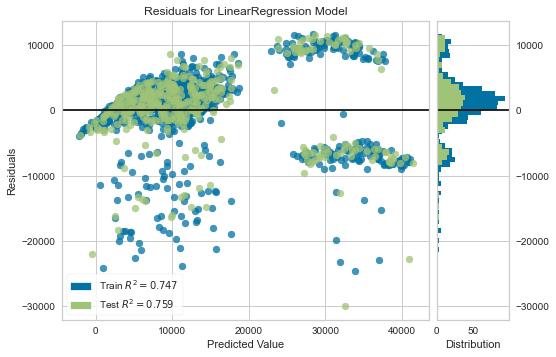

In [7]:
plot_model(lr)

# Experiment 2

In [11]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [20]:
#s2[0].columns

In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3080.4429,21361454.0000,4621.8452,0.8724,0.4132,0.3282
1,3405.0496,31559846.0000,5617.8149,0.8165,0.4286,0.3206
2,2985.2944,23914216.0000,4890.2163,0.6972,0.5783,0.3796
3,3131.2700,20930264.0000,4574.9604,0.8252,0.4749,0.4441
4,3370.0159,29325620.0000,5415.3135,0.7819,0.4617,0.3171
5,3258.9675,28324192.0000,5322.0479,0.8178,0.4336,0.3032
6,3026.9233,27750800.0000,5267.9028,0.8112,0.3815,0.3102
7,3647.9766,31155754.0000,5581.7339,0.8287,0.4983,0.3546
8,3225.5132,23174712.0000,4814.0122,0.8503,0.4037,0.3572
9,3382.2483,29852182.0000,5463.7148,0.8077,0.5222,0.3731


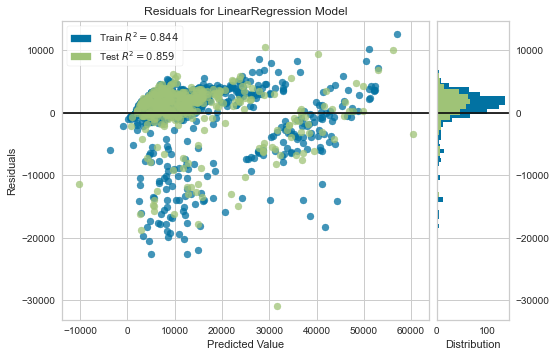

In [15]:
plot_model(lr)

In [16]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

In [17]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [18]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             target='charges',
                          

In [19]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
